In [1]:
from gensim.models import Word2Vec
import pandas as pd
import multiprocessing
import logging
from utils import LossLogger
from datetime import datetime  
import pickle
import matplotlib.pyplot as plt

MDL_FOLDER = 'models/'
SRC_FOLDER = 'formatted/dataset/'
timestamp = '20211003_031421'

In [2]:
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')  # Format: YYYYMMDD_HHMMSS
log_filename = f'training_log_{timestamp}.txt'  # Log file name with timestamp
logger = logging.getLogger()
logger.setLevel(logging.INFO)
file_handler = logging.FileHandler(MDL_FOLDER + log_filename)
file_handler.setFormatter(logging.Formatter('%(asctime)s : %(levelname)s : %(message)s'))
stream_handler = logging.StreamHandler()
stream_handler.setFormatter(logging.Formatter('%(asctime)s : %(levelname)s : %(message)s'))
logger.addHandler(file_handler)
logger.addHandler(stream_handler)

In [3]:
with open(SRC_FOLDER + 'train.pkl', 'rb') as file:
    train_data = pickle.load(file)

songs_count = 0
for p in train_data:
    songs_count += len(p)
print(songs_count)

6553507


In [ ]:

# Train Word2Vec model
model = Word2Vec(vector_size=300, window=5, min_count=5, workers=multiprocessing.cpu_count(), epochs=400, sg=0, negative=5, alpha=0.1)
model.build_vocab(train_data)

loss_logger = LossLogger()
model.train(train_data, total_examples=model.corpus_count, epochs=model.epochs,  compute_loss=True, callbacks=[loss_logger])

model.save(MDL_FOLDER + f'w2v/w2v-trained-model-{timestamp}.model')
logger.info("Model trained and saved")

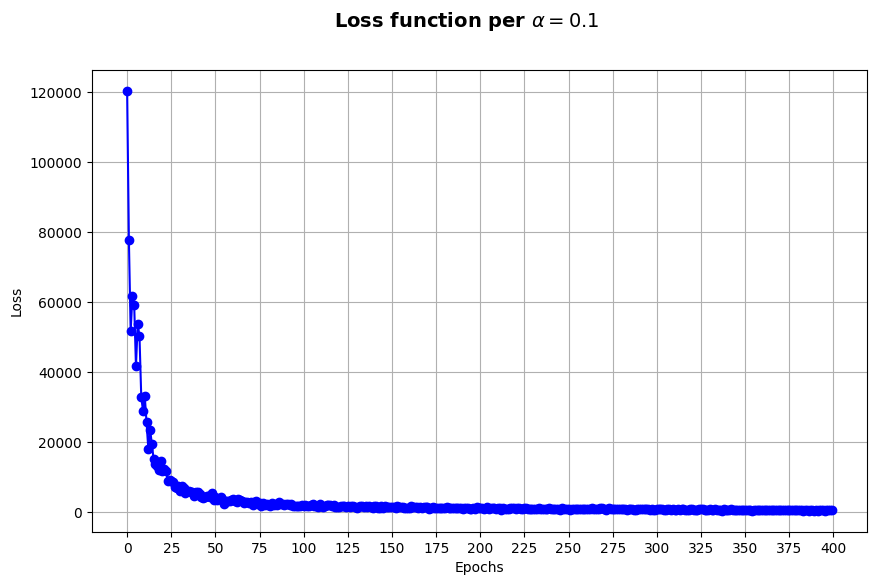

In [5]:
#questo po essere sostituito dalla lettura di un file
#log_data = loss_logger.losses
log_data = {0: 120498.1796875, 1: 77703.2421875, 2: 51704.328125, 3: 61846.03125, 4: 59185.625, 5: 41650.625, 6: 53885.5, 7: 50205.78125, 8: 32893.5625, 9: 28835.375, 10: 33063.9375, 11: 25705.875, 12: 18020.125, 13: 23549.1875, 14: 19528.0625, 15: 15043.5, 16: 13788.5625, 17: 13159.25, 18: 12099.0, 19: 14551.5625, 20: 11612.375, 21: 12150.0, 22: 11660.5, 23: 8936.25, 24: 9106.3125, 25: 8722.8125, 26: 8693.9375, 27: 7154.5625, 28: 6864.5, 29: 7457.75, 30: 6029.625, 31: 7563.5, 32: 6762.0625, 33: 5431.3125, 34: 6108.75, 35: 5872.0625, 36: 5705.3125, 37: 5663.0625, 38: 4565.6875, 39: 5569.5625, 40: 5843.3125, 41: 5084.25, 42: 4205.1875, 43: 3928.5, 44: 4362.25, 45: 4685.5, 46: 4428.0625, 47: 4178.0625, 48: 5281.5625, 49: 3487.6875, 50: 4172.6875, 51: 3542.375, 52: 3719.8125, 53: 4271.625, 54: 3603.0625, 55: 2332.8125, 56: 3043.8125, 57: 2994.75, 58: 3229.0, 59: 3284.75, 60: 3567.6875, 61: 3255.125, 62: 2888.625, 63: 3819.5, 64: 3318.8125, 65: 3175.8125, 66: 2645.625, 67: 2937.875, 68: 2848.0625, 69: 2552.5, 70: 2866.5, 71: 2022.75, 72: 2855.0625, 73: 3004.8125, 74: 2363.1875, 75: 2436.375, 76: 1818.5625, 77: 2597.0625, 78: 2097.875, 79: 2211.5, 80: 1991.875, 81: 1808.25, 82: 2418.375, 83: 2044.75, 84: 2323.125, 85: 1900.0, 86: 2841.625, 87: 2390.375, 88: 2350.75, 89: 2003.875, 90: 2136.625, 91: 2414.25, 92: 2098.875, 93: 2274.5, 94: 1600.125, 95: 1836.875, 96: 1747.125, 97: 1766.375, 98: 1785.25, 99: 1944.75, 100: 1634.375, 101: 1877.125, 102: 1792.75, 103: 1636.625, 104: 2127.5, 105: 2185.875, 106: 1756.5, 107: 1752.5, 108: 1472.25, 109: 2136.25, 110: 1781.375, 111: 1545.375, 112: 1561.125, 113: 2016.625, 114: 1982.375, 115: 1913.875, 116: 1733.25, 117: 2056.75, 118: 1495.625, 119: 1348.0, 120: 1521.5, 121: 1662.125, 122: 1605.5, 123: 1590.75, 124: 1448.375, 125: 1662.625, 126: 1508.25, 127: 1569.0, 128: 1601.625, 129: 1362.375, 130: 1227.0, 131: 1539.625, 132: 1638.625, 133: 1792.625, 134: 1494.375, 135: 1634.625, 136: 1516.5, 137: 1813.25, 138: 1502.125, 139: 1245.25, 140: 1567.25, 141: 1667.875, 142: 1052.875, 143: 1162.125, 144: 1691.625, 145: 1203.375, 146: 1624.5, 147: 1428.125, 148: 1533.125, 149: 1335.75, 150: 1495.5, 151: 1498.0, 152: 1238.5, 153: 1633.0, 154: 1437.375, 155: 1337.375, 156: 1332.75, 157: 1126.875, 158: 1006.375, 159: 1075.125, 160: 1043.75, 161: 1571.0, 162: 1525.375, 163: 1290.125, 164: 1448.0, 165: 1080.25, 166: 1283.625, 167: 1197.5, 168: 1297.375, 169: 1420.125, 170: 1518.875, 171: 949.5, 172: 1044.5, 173: 1399.625, 174: 1186.875, 175: 1145.375, 176: 1058.875, 177: 1253.375, 178: 1218.625, 179: 1148.125, 180: 1146.5, 181: 1298.875, 182: 1207.625, 183: 1272.0, 184: 1147.875, 185: 1136.75, 186: 1024.375, 187: 1257.125, 188: 1201.0, 189: 1221.75, 190: 860.0, 191: 1149.375, 192: 1074.375, 193: 1162.5, 194: 965.375, 195: 730.25, 196: 1105.875, 197: 860.125, 198: 1307.5, 199: 1265.375, 200: 1086.25, 201: 1147.625, 202: 819.25, 203: 1239.875, 204: 1282.75, 205: 906.75, 206: 1203.875, 207: 1113.0, 208: 1218.25, 209: 791.25, 210: 1088.875, 211: 1234.75, 212: 591.75, 213: 1054.0, 214: 948.875, 215: 713.375, 216: 913.0, 217: 1128.125, 218: 1112.125, 219: 1007.25, 220: 903.75, 221: 1060.875, 222: 1090.75, 223: 886.75, 224: 885.0, 225: 1138.375, 226: 1071.0, 227: 817.25, 228: 966.625, 229: 755.625, 230: 894.375, 231: 818.75, 232: 978.625, 233: 1061.5, 234: 847.875, 235: 868.875, 236: 846.625, 237: 775.5, 238: 896.125, 239: 1074.375, 240: 824.75, 241: 926.875, 242: 958.125, 243: 837.25, 244: 846.375, 245: 673.125, 246: 1036.5, 247: 767.5, 248: 935.875, 249: 828.75, 250: 805.0, 251: 696.875, 252: 787.875, 253: 783.75, 254: 924.125, 255: 860.0, 256: 831.75, 257: 883.625, 258: 882.75, 259: 873.125, 260: 807.5, 261: 922.75, 262: 883.625, 263: 1092.875, 264: 756.0, 265: 878.75, 266: 763.375, 267: 716.875, 268: 1020.875, 269: 1056.5, 270: 866.25, 271: 644.0, 272: 839.625, 273: 1039.375, 274: 803.125, 275: 735.375, 276: 755.125, 277: 740.5, 278: 820.125, 279: 980.875, 280: 714.75, 281: 860.875, 282: 821.125, 283: 662.25, 284: 894.125, 285: 726.125, 286: 725.875, 287: 652.875, 288: 644.0, 289: 742.375, 290: 929.0, 291: 754.625, 292: 866.75, 293: 750.125, 294: 743.25, 295: 728.375, 296: 633.125, 297: 754.25, 298: 699.25, 299: 667.25, 300: 804.125, 301: 828.0, 302: 858.875, 303: 705.625, 304: 680.625, 305: 694.5, 306: 795.25, 307: 756.125, 308: 643.625, 309: 802.25, 310: 696.875, 311: 678.125, 312: 818.125, 313: 552.375, 314: 818.75, 315: 729.125, 316: 679.125, 317: 600.125, 318: 602.25, 319: 806.875, 320: 741.625, 321: 656.375, 322: 640.75, 323: 543.125, 324: 727.625, 325: 741.375, 326: 873.625, 327: 646.75, 328: 624.625, 329: 553.75, 330: 724.5, 331: 670.25, 332: 465.875, 333: 704.625, 334: 655.75, 335: 521.5, 336: 564.5, 337: 372.625, 338: 753.0, 339: 653.25, 340: 641.25, 341: 595.25, 342: 717.125, 343: 625.25, 344: 639.0, 345: 673.875, 346: 540.625, 347: 603.75, 348: 608.5, 349: 611.25, 350: 656.25, 351: 564.875, 352: 594.0, 353: 524.875, 354: 412.625, 355: 655.5, 356: 481.875, 357: 577.125, 358: 589.875, 359: 518.0, 360: 659.625, 361: 491.125, 362: 614.625, 363: 510.0, 364: 608.5, 365: 492.0, 366: 425.25, 367: 689.875, 368: 599.625, 369: 638.125, 370: 560.125, 371: 442.75, 372: 512.375, 373: 424.75, 374: 433.0, 375: 475.125, 376: 541.625, 377: 466.625, 378: 463.875, 379: 641.5, 380: 494.875, 381: 544.875, 382: 432.5, 383: 373.0, 384: 483.375, 385: 524.625, 386: 387.0, 387: 432.5, 388: 460.75, 389: 408.625, 390: 451.375, 391: 351.0, 392: 445.625, 393: 424.75, 394: 485.875, 395: 360.625, 396: 490.625, 397: 518.0, 398: 517.125, 399: 426.0}

epochs = list(log_data.keys())
losses = list(log_data.values())

# Creazione del grafico
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(epochs, losses, marker='o', linestyle='-', color='b')
fig.suptitle(rf'Loss function per $\alpha = {model.alpha}$', fontsize=14, fontweight='bold') # Titolo con la lettera greca alpha
ax.grid(True)
ax.set_xticks(range(0, model.epochs, 25)) 
ax.set_xlabel('Epochs')  # Etichetta asse X
ax.set_ylabel('Loss')    # Etichetta asse Y
plt.savefig(f'figures/w2v_loss_plot-{timestamp}.png')